# upgrade Dataset

For information on how to use sqlite3 see documentation: https://docs.python.org/3/library/sqlite3.html 
1) Fetching table and column names:

In [1]:
db_path = '/remote/ceph/user/o/oersoe/workshop/data/upgrade/upgrade.db'

In [45]:
import sqlite3
import pandas as pd
import numpy as np

con = sqlite3.connect(db_path)

# Getting table and column names
query = 'select name from sqlite_master where type = "table"'
table_names = pd.read_sql(query,con)

for table_name in table_names['name']:
    print("Table name:", table_name)
    # Getting column names of table
    query = f"SELECT * FROM {table_name} LIMIT 1"
    column_names = pd.read_sql(query,con).columns
    print("Column names:", np.array(column_names))

Table name: truth
Column names: ['CascadeFilter_13' 'DeepCoreFilter_13' 'EventID' 'L3_oscNext_bool'
 'L4_oscNext_bool' 'L5_oscNext_bool' 'L6_oscNext_bool' 'L7_oscNext_bool'
 'MuonFilter_13' 'OnlineL2Filter_17' 'RunID' 'SubEventID' 'SubrunID'
 'azimuth' 'dbang_decay_length' 'elasticity' 'energy' 'energy_track'
 'event_no' 'event_time' 'inelasticity' 'interaction_type' 'pid'
 'position_x' 'position_y' 'position_z' 'sim_type' 'stopped_muon'
 'track_length' 'zenith']
Table name: SplitInIcePulses_dynedge_v2_Pulses
Column names: ['charge' 'dom_number' 'dom_time' 'dom_type' 'dom_x' 'dom_y' 'dom_z'
 'event_no' 'event_time' 'is_bad_dom' 'is_bright_dom' 'is_errata_dom'
 'is_saturated_dom' 'pmt_area' 'pmt_dir_x' 'pmt_dir_y' 'pmt_dir_z'
 'pmt_number' 'rde' 'string' 'width']


2) Plotting distribution of pid value (particle identification)

Number of neutrio events in dataset:  333038 This is equal to 66.61 %
Number of muons events in dataset:  166962 This is equal to 33.39 %


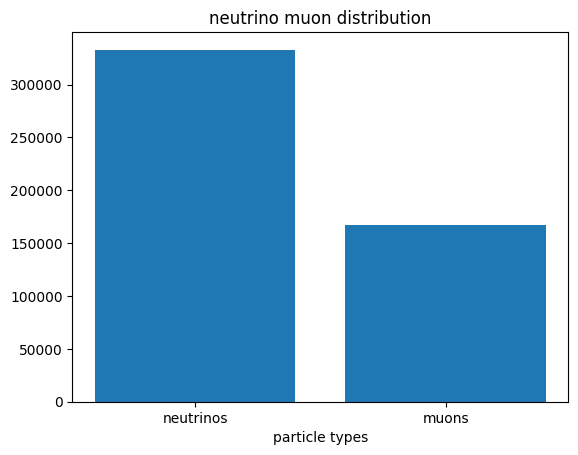

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter

# Important pid Values:
dict = {'election neutrino': 12, 
        'muon': 13, 
        'muon neutrino': 14, 
        'tau neutrino': 16}

sql = f"SELECT pid FROM truth"
column_data = pd.read_sql(sql, con)
column_data = np.absolute(np.array(column_data).reshape(len(column_data)))
count = Counter(column_data)
neutrinos = count[12.0] + count[14.0] + count[16.0]
muons = count[13.0]
print("Number of neutrio events in dataset: ", neutrinos, f"This is equal to {round(neutrinos/len(column_data)*100, 2)} %")
print("Number of muons events in dataset: ", muons, f"This is equal to {round(muons/len(column_data)*100, 2)} %")
plt.bar(['neutrinos', 'muons'], height = [neutrinos, muons])

# Show plot
plt.title("neutrino muon distribution")
plt.xlabel('particle types')
plt.show()

2) Plotting distribution event energy

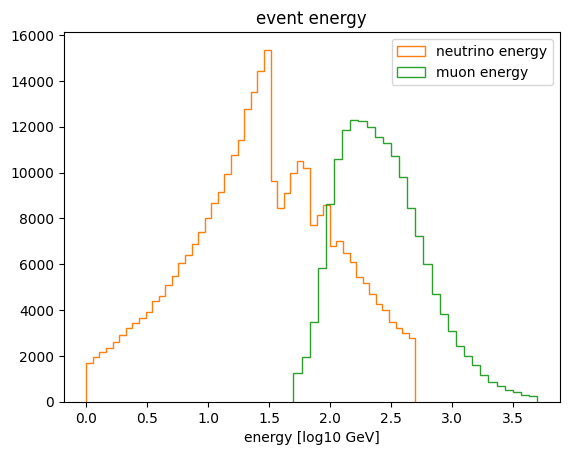

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pid_dict = {
    'neutrinos':[12,14,16], 
    'muons': [13]
}

colors = ['tab:blue', 'tab:orange']
sql = f"SELECT energy, pid FROM truth"
column_data = pd.read_sql(sql, con)
neutrinos = np.log10(column_data[column_data.pid.abs().isin(pid_dict['neutrinos'])].energy.copy())
muons = np.log10(column_data[column_data.pid.abs().isin(pid_dict['muons'])].energy.copy())
plt.hist(neutrinos, histtype = 'step', label= 'neutrino energy', bins=50, color='tab:orange')
plt.hist(muons, histtype = 'step', label= 'muon energy', bins=30, color='tab:green')
    
# Show plot
plt.title("event energy")
plt.legend()
plt.xlabel('energy [log10 GeV]')


plt.show()

 

3) Plotting Distribution of xyz-coordinates of sensors 

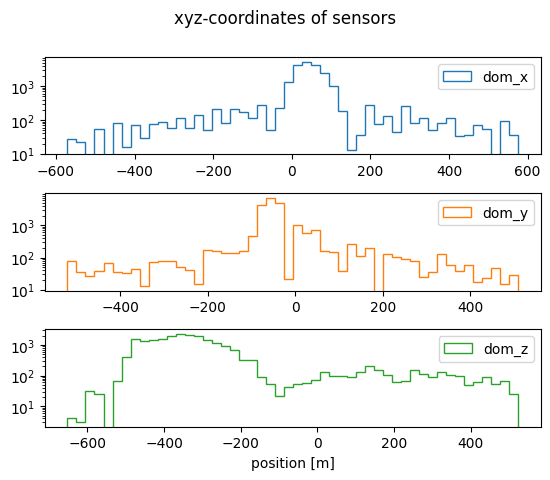

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = 50
fig, ax = plt.subplots(3)
colors = ['tab:blue', 'tab:orange', 'tab:green']
query = 'SELECT EventID FROM truth'
event_nos = pd.read_sql(query,con).sample(frac= 0.1).reset_index(drop = True)

for count, i in enumerate(['dom_x', 'dom_y', 'dom_z']):
    query = f'SELECT {i} FROM SplitInIcePulses_dynedge_v2_Pulses WHERE event_no in {str(tuple(event_nos["EventID"]))}'
    column_data = pd.read_sql(query,con)
    ax[count].hist(column_data, histtype = 'step', label= i, bins=bins, color=colors[count])
    ax[count].legend()
    ax[count].set_yscale('log')


# Show plot
fig.suptitle("xyz-coordinates of sensors")
plt.subplots_adjust(hspace=0.4)
plt.xlabel('position [m]')


plt.show()
 

4) Plotting distribution of Azimuth and Zenith angle

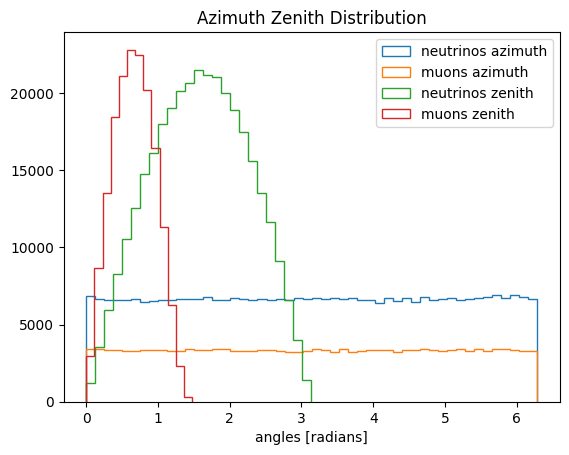

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

bins = [[50,50], [25,13]]
pid_dict = {
    'neutrinos':[12,14,16], 
    'muons': [13]
}

for count, i in enumerate(['azimuth', 'zenith']):
    sql = f"SELECT pid, {i} FROM truth"
    column_data = pd.read_sql(sql, con)
    neutrinos = column_data[column_data.pid.abs().isin(pid_dict['neutrinos'])][i].copy()
    muons = column_data[column_data.pid.abs().isin(pid_dict['muons'])][i].copy()
    plt.hist(neutrinos, histtype = 'step', label= f'neutrinos {i}', bins=bins[count][0])
    plt.hist(muons, histtype = 'step', label= f'muons {i}', bins=bins[count][1])

# Show plot
plt.title("Azimuth Zenith Distribution")
plt.legend()
plt.xlabel('angles [radians]')
plt.show()
